<a href="https://colab.research.google.com/github/gogowonji/Big-Data-Analysis/blob/main/20230502_project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,293 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and di

In [1]:
#타이타닉생존율분석
#결측치 치환해야함
#상관관계의 정도 - 상관 계수 
#회귀분석 - 인과관계를 설명 - 영향력의 크기를 알아내야 함

import seaborn as sns
import pandas as pd
titanic = sns.load_dataset("titanic")
titanic.to_csv('titanic.csv',index = False)

In [2]:
#결측값 확인
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
#결측값 채우기
print(titanic['age'].median())
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

print(titanic['embarked'].value_counts())
titanic['embarked'] = titanic['embarked'].fillna('S')

print(titanic['deck'].value_counts())
titanic['deck'] = titanic['deck'].fillna('C')

print(titanic['embark_town'].value_counts())
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

28.0
S    644
C    168
Q     77
Name: embarked, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


In [4]:
#결측값 다시 확인
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [5]:
# 기본 정보 확인하기
titanic.info()
titanic.survived.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


0    549
1    342
Name: survived, dtype: int64

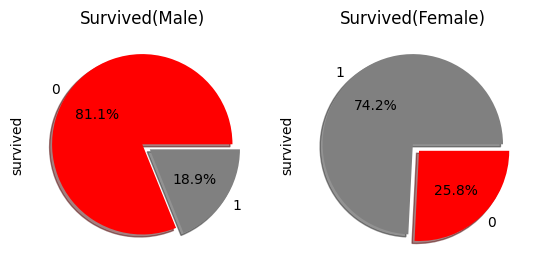

In [6]:
import matplotlib.pyplot as plt

# pie 차트 그리기
male_color = ['red','grey']
female_color = ['grey','red']

plt.subplot(1,2,1)
titanic['survived'][titanic['sex']=='male'].value_counts().plot.pie(
    explode=[0,0.1],colors=male_color,autopct='%1.1f%%',shadow=True)
plt.title('Survived(Male)')

plt.subplot(1,2,2)
titanic['survived'][titanic['sex']=='female'].value_counts().plot.pie(
    explode=[0,0.1],colors=female_color,autopct='%1.1f%%',shadow=True)
plt.title('Survived(Female)')

plt.show()


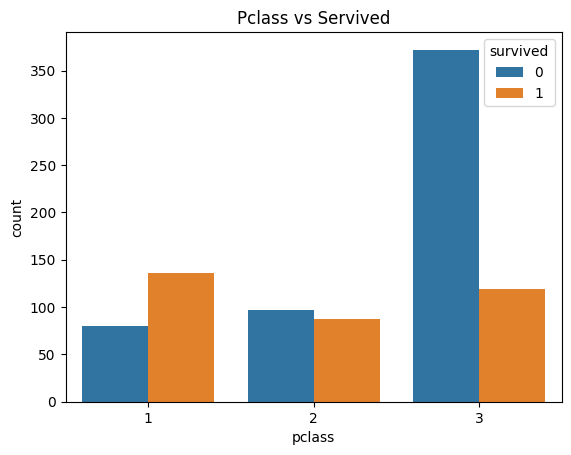

In [7]:
'''
import matplotlib.pyplot as plt
import seaborn as sns
'''
sns.countplot(x='pclass',hue='survived',data=titanic)
plt.title('Pclass vs Servived')
plt.show()

In [8]:
# 상관관계 분석 - corr() 상관계수 - 피어슨
titanic_corr = titanic.corr(method='pearson')
titanic_corr.to_csv('titanic_corr.csv', index=False)

print(titanic['survived'].corr(titanic['adult_male']))
print(titanic['survived'].corr(titanic['fare']))

-0.5570800422053257
0.2573065223849625


<ipython-input-8-e4f9dbf8caae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_corr = titanic.corr(method='pearson')


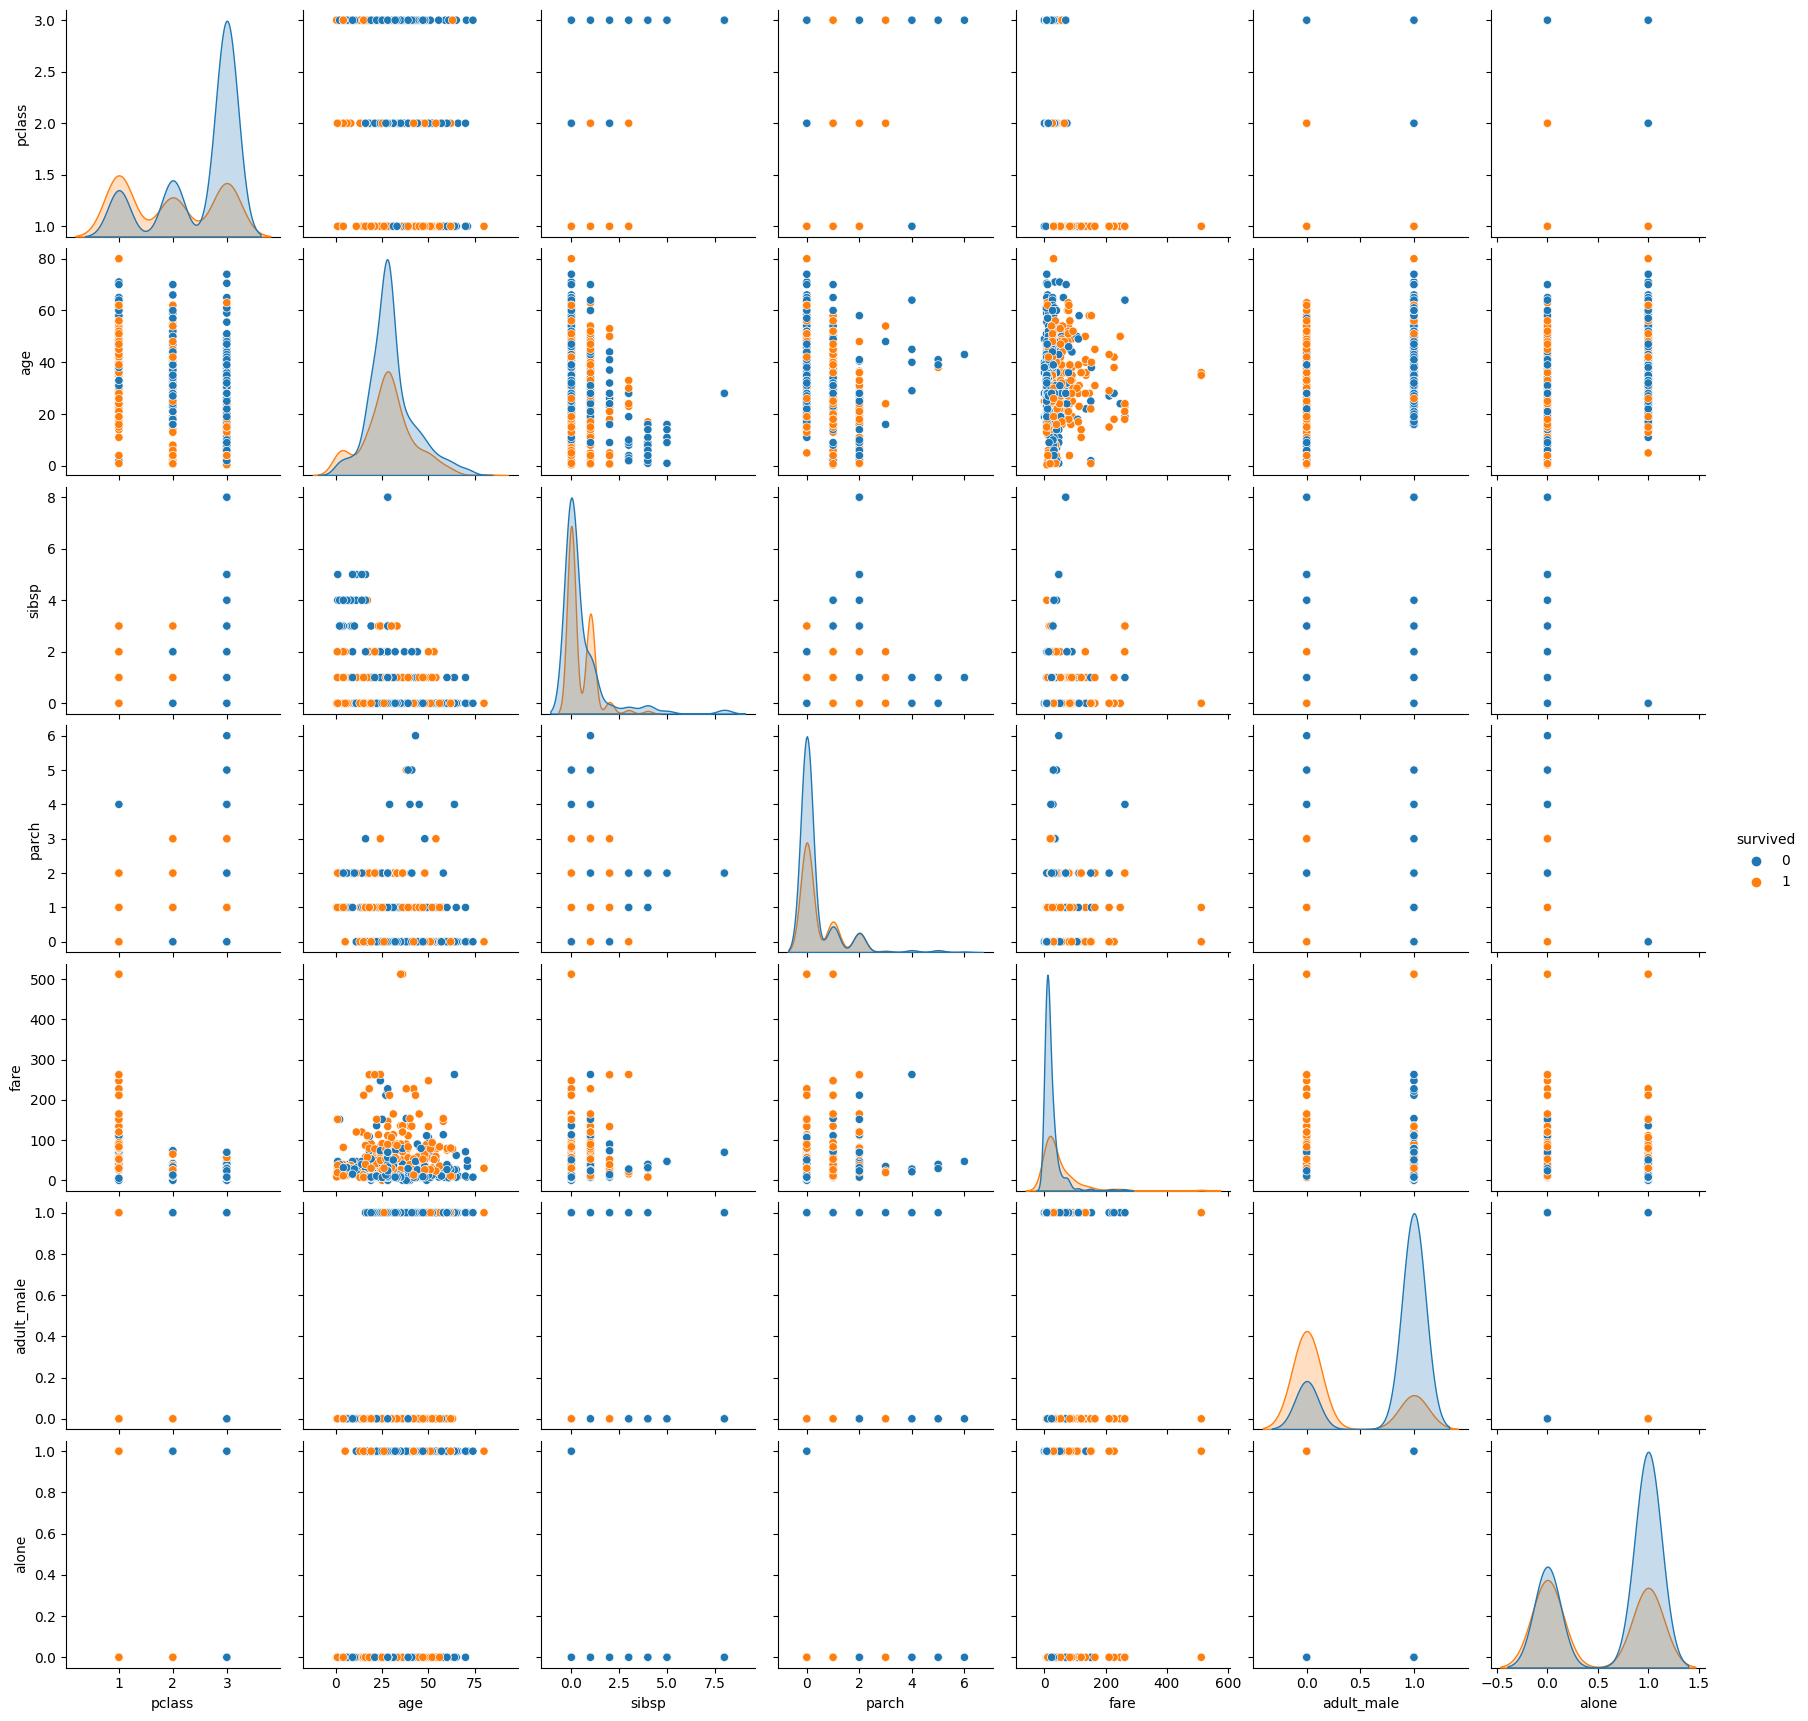

In [9]:
# 산점도
sns.pairplot(titanic, hue ='survived')
plt.show()

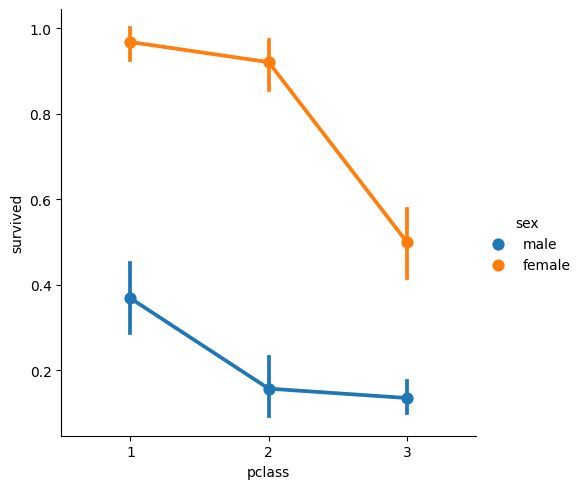

In [10]:
# catplot
sns.catplot(x='pclass',y='survived',hue='sex',data=titanic,kind='point')
plt.show()

In [11]:
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

<ipython-input-39-5abc0877b8cd>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female = titanic[titanic['survived'] == 0][titanic['sex']=='female']['pclass'].value_counts()
<ipython-input-39-5abc0877b8cd>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male = titanic[titanic['survived'] == 0][titanic['sex']=='male']['pclass'].value_counts()


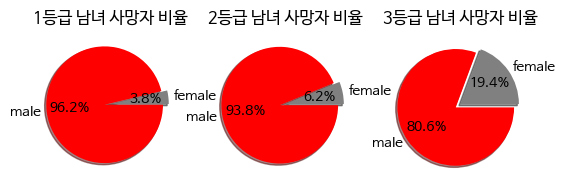

In [39]:
# 세가지 변수 사용 pie 그래프 그리기 1
pclass_color = ['grey','red']
labels = 'female','male'


female = titanic[titanic['survived'] == 0][titanic['sex']=='female']['pclass'].value_counts()
male = titanic[titanic['survived'] == 0][titanic['sex']=='male']['pclass'].value_counts()


plt.subplot(1,3,1)
plt.pie([female[1],male[1]], explode=[0,0.1], labels=labels, colors=pclass_color, shadow=True, autopct='%1.1f%%')
plt.title('1등급 남녀 사망자 비율')


plt.subplot(1,3,2)
plt.pie([female[2],male[2]], explode=[0,0.1], labels=labels, colors=pclass_color, shadow=True, autopct='%1.1f%%')
plt.title('2등급 남녀 사망자 비율')

plt.subplot(1,3,3)
plt.pie([female[3],male[3]], explode=[0,0.1], labels=labels, colors=pclass_color, shadow=True, autopct='%1.1f%%')
plt.title('3등급 남녀 사망자 비율')


plt.show()



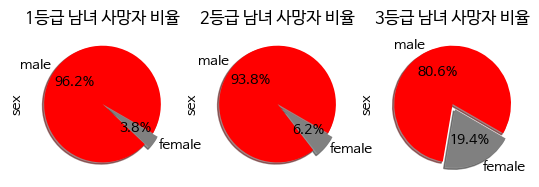

In [38]:
# 세가지 변수 사용 pie 그래프 그리기 2
class_color1 = ['red','gray']
plt.subplot(1,3,1)
titanic['sex'][titanic['survived']==0][titanic['pclass']==1].value_counts().plot.pie(
    explode=[0,0.1],colors=pclass_color1,startangle=330,shadow=True,autopct='%1.1f%%')
plt.title('1등급 남녀 사망자 비율')

plt.subplot(1,3,2)
titanic['sex'][titanic['survived']==0][titanic['pclass']==2].value_counts().plot.pie(
    explode=[0,0.1],colors=pclass_color1,startangle=330,shadow=True,autopct='%1.1f%%')
plt.title('2등급 남녀 사망자 비율')

plt.subplot(1,3,3)
titanic['sex'][titanic['survived']==0][titanic['pclass']==3].value_counts().plot.pie(
    explode=[0,0.1],colors=pclass_color1,startangle=330,shadow=True,autopct='%1.1f%%')
plt.title('3등급 남녀 사망자 비율')
plt.show()


